In [82]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/clothessizeprediction/final_test.csv


In [83]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline 

In [84]:
df = pd.read_csv('../input/clothessizeprediction/final_test.csv')
df.shape

(119734, 4)

In [85]:
df.isna().sum()

weight      0
age       257
height    330
size        0
dtype: int64

In [86]:
df.columns

Index(['weight', 'age', 'height', 'size'], dtype='object')

In [87]:
df.sample(10)

,weight,age,height,size
58726,56,32.0,170.18,L
109118,51,32.0,160.02,XXS
35567,72,53.0,167.64,XXXL
91256,70,38.0,157.48,XXXL
51232,63,28.0,160.02,XL
34395,56,29.0,162.56,L
66901,81,36.0,172.72,XXXL
38421,65,34.0,157.48,L
93505,58,26.0,160.02,XL
72939,68,33.0,167.64,XXXL


In [88]:
df['size'].value_counts()

M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: size, dtype: int64

In [89]:
df.dropna(inplace=True)

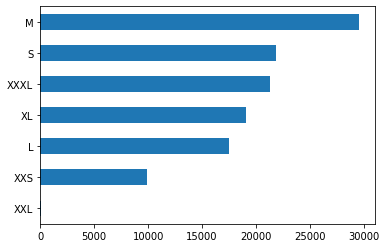

In [90]:
df['size'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()
plt.show()

## **Histogram**

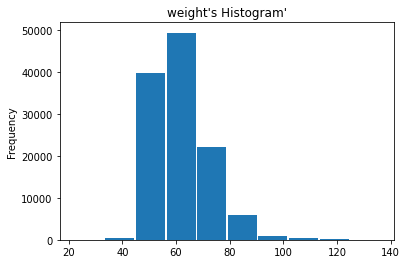

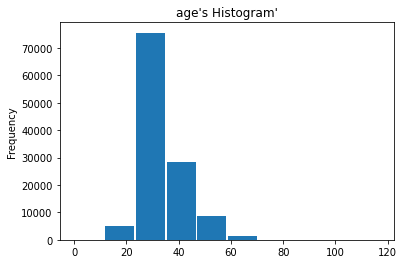

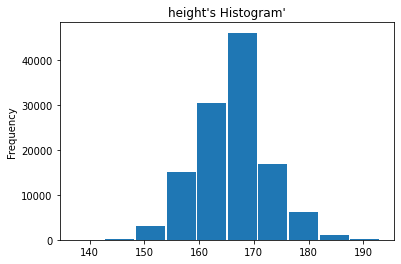

In [91]:
for column in df.columns[:3]:
    plt.title(f"{column}'s Histogram'")
    df[column].plot(kind='hist',rwidth=0.95)
    plt.show()
    print('\n')

## **Scaling Age,Weight and Height columns**

In [92]:
age_scale = MinMaxScaler()
age_scale.fit(df[['age']])
age = age_scale.fit_transform(df[['age']]).flatten()
df['age'] = age

In [93]:
height_scale = MinMaxScaler()
height_scale.fit(df[['height']])
height = height_scale.fit_transform(df[['height']]).flatten()
df['height'] = height

In [94]:
weight_scale = MinMaxScaler()
weight_scale.fit(df[['weight']])
weight = weight_scale.fit_transform(df[['weight']]).flatten()
df['weight'] = weight

<Figure size 720x720 with 0 Axes>

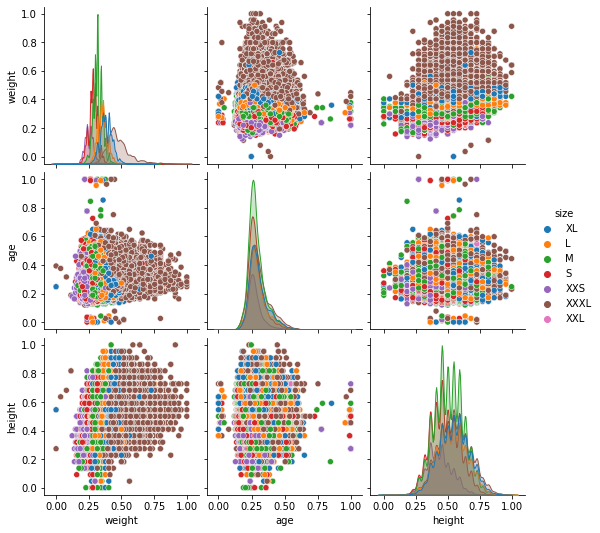

In [95]:
plt.figure(figsize=(10,10))
sns.pairplot(data=df, hue='size')
plt.show()

In [96]:
new_df = df[df['size']!='XXL']

In [97]:
new_df.shape

(119084, 4)

In [98]:
new_df.sample(10)

,weight,age,height,size
93776,0.280702,0.205128,0.363636,S
74890,0.596491,0.290598,0.545455,XXXL
58007,0.298246,0.341880,0.318182,XL
32617,0.377193,0.239316,0.545455,M
113198,0.236842,0.264957,0.318182,XXS
73579,0.280702,0.256410,0.318182,M
327,0.315789,0.341880,0.590909,M
32472,0.342105,0.230769,0.545455,M
37155,0.298246,0.205128,0.500000,M
118108,0.263158,0.188034,0.545455,M


In [99]:
new_df['size'].value_counts()

M       29575
S       21829
XXXL    21259
XL      19033
L       17481
XXS      9907
Name: size, dtype: int64

In [101]:
size_class = {
    'S':0,
    'M':1,
    'L':2,
    'XL':3,
    'XXS':4,
    'XXXL':5,
}

new_df['size'].replace(size_class,inplace=True)